In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split



Read Data

In [4]:
# Read the dataset from a CSV file  and show the header of data
data = pd.read_csv('diabetes.csv')
data.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1


Size of dataset

In [5]:
data.shape

(768, 8)

In [6]:
data.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

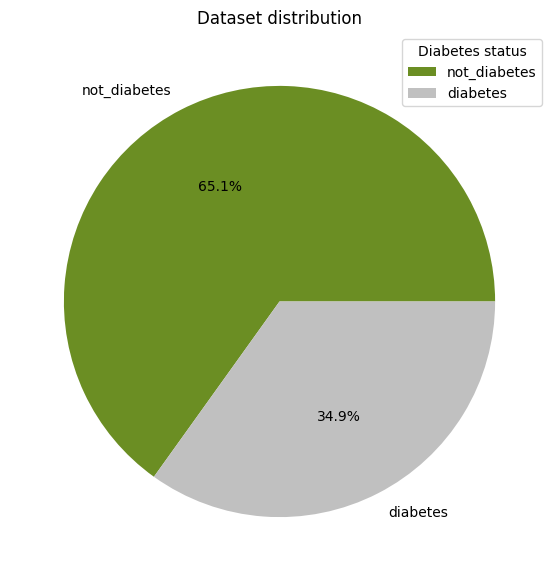

In [10]:
# check if the dataset is balanced
outcome = ["not_diabetes", "diabetes"]
colors = ["olivedrab", "silver"]

plt.figure(figsize=(7,7))
plt.pie(data["Outcome"].value_counts(), labels=outcome, colors=colors, autopct="%1.1f%%")
plt.legend(title = "Diabetes status")
plt.title("Dataset distribution")
plt.show()

0 --> Non-Diabetic

1 --> Diabetic

Extract features and output

In [11]:

X = data.iloc[:, :-1].values  #features
y = data.iloc[:, -1].values  #output

Calculate mean and standard deviation for feature scaling

In [12]:

mu = np.mean(X, axis=0)
sigma = np.std(X, axis=0)

Apply feature scaling to the feature matrix X


In [13]:
X = (X - mu) / sigma

Split the data into training and testing sets (20% test)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Add a column of ones for the intercept term to both training and testing sets
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

Initialize parameters

In [16]:
initial_theta = np.zeros(X_train.shape[1])  # Initial values for theta
lambda_reg = 1  # Regularization parameter
alpha = 0.01  # Learning rate
iterations = 1000

Define the sigmoid function and the cost function with regularization

In [17]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(theta, X, y, lambda_reg):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    reg_term = (lambda_reg / (2 * m)) * np.sum(theta[1:]**2)
    J = (-1 / m) * (np.dot(y, np.log(h)) + np.dot(1 - y, np.log(1 - h))) + reg_term
    gradient = (1 / m) * np.dot(X.T, (h - y))
    gradient[1:] += (lambda_reg / m) * theta[1:]
    return J, gradient

# Implement gradient descent with regularization and cost tracking
def gradient_descent(X, y, theta, alpha, lambda_reg, iterations):
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        cost, gradient = cost_function(theta, X, y, lambda_reg)
        theta -= alpha * gradient
        cost_history.append(cost)

    return theta, cost_history

def predict(theta, X):
    probability = sigmoid(np.dot(X, theta))
    print(probability)
    return (probability >= 0.5).astype(int)  # return 1 or 0

Perform gradient descent on the training set


In [18]:
theta, cost_history = gradient_descent(X_train, y_train, initial_theta, alpha, lambda_reg, iterations)
for iteration, cost in enumerate(cost_history):
    print(f'Iteration {iteration+1}: Cost = {cost}')

Iteration 1: Cost = 0.6931471805599452
Iteration 2: Cost = 0.691950843446682
Iteration 3: Cost = 0.6907634301784501
Iteration 4: Cost = 0.6895848671189088
Iteration 5: Cost = 0.6884150810691524
Iteration 6: Cost = 0.6872539992717003
Iteration 7: Cost = 0.6861015494142705
Iteration 8: Cost = 0.6849576596333354
Iteration 9: Cost = 0.6838222585174698
Iteration 10: Cost = 0.6826952751104872
Iteration 11: Cost = 0.6815766389143741
Iteration 12: Cost = 0.6804662798920257
Iteration 13: Cost = 0.6793641284697817
Iteration 14: Cost = 0.6782701155397735
Iteration 15: Cost = 0.6771841724620814
Iteration 16: Cost = 0.6761062310667074
Iteration 17: Cost = 0.6750362236553669
Iteration 18: Cost = 0.6739740830031059
Iteration 19: Cost = 0.6729197423597445
Iteration 20: Cost = 0.6718731354511508
Iteration 21: Cost = 0.6708341964803526
Iteration 22: Cost = 0.6698028601284862
Iteration 23: Cost = 0.6687790615555902
Iteration 24: Cost = 0.667762736401245
Iteration 25: Cost = 0.6667538207850655
Iteration 2

Plot the cost function as a function of iterations

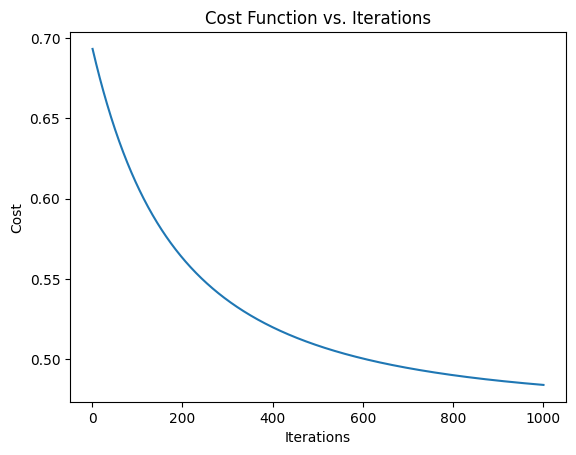

In [19]:
plt.plot(range(1, iterations + 1), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function vs. Iterations')
plt.show()

Precision, Recall, Specificity, Accuracy, and F1-score 

In [22]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score
# Make predictions on the testing set
predictions = predict(theta, X_test)
# Calculate accuracy
accuracy = np.mean(predictions == y_test) * 100
# Calculate Precision
precision = precision_score(y_test, predictions) * 100
# Calculate Recall
recall = recall_score(y_test, predictions) * 100
# Calculate F1-Score
f1score = f1_score(y_test, predictions) * 100

# Calculate Specificity
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
specificity = (tn / (tn + fp)) * 100

print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"Specificity: {specificity:.2f}%")
print(f"Accuracy of the model: {accuracy:.2f}%")
print(f"F1-Score of the model: {f1score:.2f}%")

[0.33112194 0.22554055 0.1648226  0.22595061 0.49585957 0.4965129
 0.0466497  0.58741803 0.53613716 0.75124205 0.25197326 0.83698138
 0.38841553 0.38439209 0.13799837 0.42553207 0.18808615 0.12107411
 0.70091451 0.54020232 0.28952535 0.15828556 0.40385584 0.15587194
 0.4694409  0.78555135 0.15400756 0.08612589 0.30043603 0.21314242
 0.83274297 0.83919695 0.71139677 0.70616018 0.66885748 0.60631239
 0.92780616 0.3712678  0.48210421 0.56408711 0.11840936 0.64913645
 0.5951856  0.28591827 0.07138889 0.54373685 0.69106139 0.24194858
 0.43294159 0.94243207 0.08624662 0.65334441 0.75362647 0.29911571
 0.18392834 0.08536202 0.74281275 0.01735894 0.42603749 0.66265708
 0.64529789 0.36130972 0.40271586 0.26942114 0.15622941 0.57232415
 0.09794962 0.67293822 0.10726558 0.74230666 0.6540242  0.13898327
 0.25101701 0.19547931 0.1378467  0.59173781 0.30602901 0.23546047
 0.22580597 0.29244557 0.56159681 0.2157895  0.12752079 0.4465741
 0.33124    0.77798097 0.7845264  0.39637187 0.17509922 0.138015

Example prediction (Test the new data)

0 --> Non-Diabetic

1 --> Diabetic



Glucose	| BloodPressure	| SkinThickness	| Insulin| 	BMI	| DiabetesPedigreeFunction	| Age	|

In [21]:
diabetic_test = np.array([166,72,19,175,25.8,0.587,51])  # Replace with the marks of the student you want to predict
diabetic_test = (diabetic_test - mu) / sigma
diabetic_test = np.insert(diabetic_test, 0, 1)
result = predict(theta, diabetic_test)
print(result)
if result == 1:
    print("The person is diabetic.")
else:
    print("The person is not  diabetic.")


0.6695776307687614
1
The person is diabetic.
